In [1]:
# ref https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import figure, pyplot
import math
import nltk
from nltk.corpus import stopwords
from datetime import datetime
import pandas as pd
from scipy.sparse import coo_matrix

from operator import itemgetter
import heapq
import collections
from pathlib import Path



In [3]:
doclist = []
names = []
pathlist = Path("Data").glob('**/*.txt')
print(pathlist)
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    print(path_in_str)
    name = path_in_str.split("\\")[1].split(".")[0]
    names.append(name)
    #TODO SPLIT PATH TO COMPANY NAME, make Index
    file = open(path, "r") 
    # print "Output of Readlines after appending"
    text = file.readlines()
  

    doclist.append(text[0])


<generator object Path.glob at 0x0000019950637CA8>
Data\1800FLOWERSCOMInc.txt
Data\2UInc.txt
Data\3DSystemsCorporation.txt


In [4]:
# doclist[1]
names

['1800FLOWERSCOMInc', '2UInc', '3DSystemsCorporation']

In [5]:
def split_document(document):
    split_text = [word.lower() for word in document.split(".")]
#     TODO REPLACE WITH STOPWORDS??

#     vectorizer = TfidfVectorizer(stop_words='english')
    return split_text



In [45]:
def big_split():
    big_split_text_list = []
    big_split_name_list = []
    for counter, document in enumerate(doclist):
        name = names[counter]
        print(len(document))
        split_text =  [word.lower() for word in document.split(".")]
        big_split_name_list += [name for word in document.split(".")]
        big_split_text_list += split_text

#     TODO REPLACE WITH STOPWORDS??

#     vectorizer = TfidfVectorizer(stop_words='english')
    return big_split_text_list, big_split_name_list

In [46]:
def vectorize_text(split_text_entry):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,5))
    sparseMatrix = vectorizer.fit_transform(split_text_entry)
    # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
    return sparseMatrix, vectorizer  

In [47]:
more_stops = ['\\t\\t\\t', 
        '\\t\\t\\', '\\t\\t\\t',
        '<U+25CF>']

In [48]:
split_text = split_document(doclist[0])
# sparseMatrix, vectorizer = vectorize_text(split_text)
# for multiple files, uncomment below
big_split_text_list, big_split_name_list = big_split()
sparseMatrix, vectorizer = vectorize_text(big_split_text_list)


41112
109673
53456


In [54]:
big_split_name_list

['1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOWERSCOMInc',
 '1800FLOW

In [15]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 5), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [16]:
sparseMatrix

<1717x50858 sparse matrix of type '<class 'numpy.float64'>'
	with 68973 stored elements in Compressed Sparse Row format>

C:\Users\xanen\Anaconda3\envs\Tensor\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


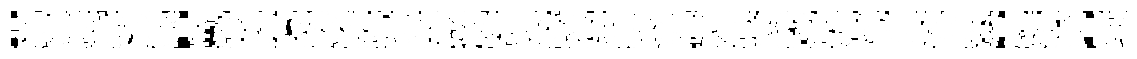

In [17]:
%matplotlib inline  

# https://stackoverflow.com/questions/22961541/python-matplotlib-plot-sparse-matrix-pattern
def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = pyplot.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, facecolor ='black')
    ax.plot(m.col, m.row, 's', color='white', ms=3)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax



ax = plot_coo_matrix(sparseMatrix)
ax.figure.show()


In [21]:
# truek = PLEASE_FIND_ME
def cluster_it(sparseMatrix, vectorizer):
    truek = 15
    model = KMeans(n_clusters=truek, init='k-means++', max_iter=100, n_init=1)
    model.fit(sparseMatrix)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    return terms, order_centroids, model, truek

In [22]:

 terms, order_centroids, model, truek = cluster_it(sparseMatrix, vectorizer)

In [23]:
# using joblib to pickle model
from sklearn.externals import joblib
joblib.dump(model,  'doc_cluster.pkl')
model = joblib.load('doc_cluster.pkl')

In [24]:
clusters = model.labels_.tolist()
clusters

[5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 12,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 13,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5

In [122]:
def dataframe_it(big_split_text_list, big_split_name_list, clusters):
    first_we_dict = {'company': big_split_name_list, 'split': big_split_text_list, 'cluster': clusters}
    frame = pd.DataFrame(first_we_dict, index =clusters, columns = ['cluster', 'company', 'split'])   
    return frame

In [125]:
all_doc_df = dataframe_it(big_split_text_list, big_split_name_list, clusters)

In [126]:
all_doc_df.head()

,cluster,company,split
5,5,1800FLOWERSCOMInc,"[1] ""item 1a"
5,5,1800FLOWERSCOMInc,risk factors
8,8,1800FLOWERSCOMInc,cautionary statements under the private secur...
5,5,1800FLOWERSCOMInc,our disclosures and analysis in this form 10-...
5,5,1800FLOWERSCOMInc,"from time to time, we also provide forward-lo..."


In [128]:
terms[:15]

['00',
 '00 share',
 '00 share high',
 '00 share high 23',
 '000',
 '000 000',
 '000 000 shares',
 '000 000 shares preferred',
 '000 000 shares preferred stock',
 '000 shares',
 '000 shares preferred',
 '000 shares preferred stock',
 '0095',
 '0095 ability',
 '0095 ability effectively']

In [129]:
nclosest_words_to_show = 5
for i in range(truek):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :nclosest_words_to_show]:
     print(' %s' % terms[ind])

Cluster 0:
 million years
 years ended
 31 2017 2016
 31 2017 2016 2015
 31 2017 2016 2015 respectively
Cluster 1:
 limited
 operating
 limited subject number uncertainties
 history ability forecast future operating
 limited subject
Cluster 2:
 feff
 zar significant employee base south
 engines impact ability effectively utilize
 enhance cyber security
 enhance cyber
Cluster 3:
 terminate contracts
 clients fail renew
 reduce revenue subject
 revenue subject liability cause university
 revenue subject liability cause
Cluster 4:
 stock sole
 result capital appreciation common stock
 appreciation common stock
 appreciation common
 common stock sole
Cluster 5:
 table contents
 contents
 table
 company
 business
Cluster 6:
 begin
 students enrolled
 students
 enrolled
 receive
Cluster 7:
 000
 example board directors
 authority issue 000
 board directors authority issue
 board directors authority issue 000
Cluster 8:
 private securities litigation
 private securities
 reform
 reform act 19

In [131]:
print('\n')
print('Prediction')
X = vectorizer.transform(['Market outlook on coffee looks promising'])
predicted = model.predict(X)
print(predicted)





Prediction
[5]


In [132]:
# HOW DO WE FIND OUT WHAT #7 meams?, 1Closest_word to cluster definitely isn't it
# for i in range(truek):
#  print('Cluster %d:' % i),
#  for ind in order_centroids[i, :1]:
#      print(' %s' % terms[ind])

In [ ]:
for 

In [ ]:
## TF-IDF analysis 
from nltk.corpus import stopwords
print(stopwords.words('english'))
def get_wordset(doc_text):
    words = doc_text.split(" ")
    wordSet = []
    stopWordsSet =  set(stopwords.words('english'))

#     print(stopWords)
    for w in words:
    #     wordSet.append(w)

        if w not in stopWordsSet:
            wordSet.append(w)
    return wordSet

In [ ]:
def get_wordDict(wordSet):
    wordDict = dict.fromkeys(wordSet, 0) 
    for word in wordSet:
        wordDict[word]+=1

    return wordDict

In [ ]:


def computeTF(document_text):
    wordset = get_wordset(document_text)
    word_dict = get_wordDict(wordset)
    tfDict = {}
    word_count = len(wordset)
    for word, count in word_dict.items():
        tfDict[word] = count/float(word_count)
    return tfDict

In [ ]:
doclist[0]

In [ ]:
term_freqs = []
for i  in range(len(doclist)):
    print(i)
    term_frequency = computeTF(doclist[i])
    term_freqs.append(term_frequency)

In [ ]:
term_freqs[0]

In [ ]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    big_wordset = []
    for doc in docList:
        big_wordset += get_wordset(doc)
    big_wordDict = get_wordDict(big_wordset)
        
    idfDict = dict.fromkeys(big_wordDict.keys(), 0)
  
    for word, val in big_wordDict.items():
        if val > 0:
            idfDict[word] += 1

    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [ ]:
idfs = computeIDF(doclist)
idfs

In [ ]:
def computeTFIDF(term_frequency, idfs):
    tfidf = {}
    for word, val in term_frequency.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [ ]:
for doc in 
tfidfBow = computeTFIDF(term_frequency, idfs)


In [ ]:
tfidfBow


In [ ]:
# from https://stackoverflow.com/questions/4743035/obtaining-the-least-common-element-in-array
def least_common_values(array, to_find=None):
    counter = collections.Counter(array)
    if to_find is None:
        return sorted(counter.items(), key=itemgetter(1), reverse=False)
    return heapq.nsmallest(to_find, counter.items(), key=itemgetter(1))
least_common_values(tfidfBow, 20)

In [ ]:
collections.Counter(tfidfBow).most_common(20)


In [ ]:
collections.Counter(term_frequency).most_common(20)



In [ ]:
# Latent Dirichlet Allocation
# Ref http://brandonrose.org/clustering
# LDA is a probabilistic topic model that assumes documents
# are a mixture of topics and that each word in the document is attributable to the document's topics.
from nltk.stem.snowball import SnowballStemmer
import re
stemmer = SnowballStemmer("english")
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

input_texts = doclist

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns
from gensim import corpora, models, similarities 

#remove proper names0
%time preprocess = [strip_proppers(doc) for doc in input_texts]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]
# print(texts)
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)
# print(dictionary)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
# dictionary.filter_extremes(no_below=1, no_above=0.8)  THIS FILTERS EVERYTHING OUT
# print(dictionary)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]
# print(corpus)
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)


In [ ]:
topics_matrix = lda.show_topics(formatted=False, num_words=15)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word[0]) for word in i])
    print()

In [ ]:
# https://en.wikipedia.org/wiki/Latent_semantic_analysis#Latent_semantic_indexing
lsi = models.lsimodel.LsiModel(corpus, num_topics=5, id2word=dictionary, chunksize=1000)
topics_matrix = lsi.show_topics(formatted=False, num_words=15)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word[0]) for word in i])
    print()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X[0])
print()
print(dist)